In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
uri = os.getenv("URI")

df = pd.read_csv(uri)
df.head(5)

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


# Quais são os principais fatores que se correlacionam com notas mais baixas ou problemas de saúde mental?

In [8]:
df.describe()

,ID,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,15.969667,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,5.460333,5.546333,0.507333,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,5.459667,6.015100,8.881900
std,866.169729,1.989489,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,2.871557,2.860754,0.500030,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,2.864572,2.014776,1.609598
min,1.000000,13.000000,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,750.750000,14.000000,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,3.000000,3.000000,0.000000,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,3.000000,4.700000,8.000000
50%,1500.500000,16.000000,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,5.000000,6.000000,1.000000,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,5.000000,6.000000,10.000000
75%,2250.250000,18.000000,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,8.000000,8.000000,1.000000,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,8.000000,7.400000,10.000000
max,3000.000000,19.000000,11.500000,10.000000,100.000000,10.000000,4.000000,10.000000,10.000000,10.000000,1.000000,2.600000,150.000000,20.000000,5.000000,4.000000,3.000000,10.000000,14.000000,10.000000


In [9]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [ ]:
# Verificar valores faltantes
for col in df.columns:
    print(f"A coluna {col} tem {df[col].isnull().sum()} valores faltantes")

A coluna ID tem 0 valores faltantes
A coluna Name tem 0 valores faltantes
A coluna Age tem 0 valores faltantes
A coluna Gender tem 0 valores faltantes
A coluna Location tem 0 valores faltantes
A coluna School_Grade tem 0 valores faltantes
A coluna Daily_Usage_Hours tem 0 valores faltantes
A coluna Sleep_Hours tem 0 valores faltantes
A coluna Academic_Performance tem 0 valores faltantes
A coluna Social_Interactions tem 0 valores faltantes
A coluna Exercise_Hours tem 0 valores faltantes
A coluna Anxiety_Level tem 0 valores faltantes
A coluna Depression_Level tem 0 valores faltantes
A coluna Self_Esteem tem 0 valores faltantes
A coluna Parental_Control tem 0 valores faltantes
A coluna Screen_Time_Before_Bed tem 0 valores faltantes
A coluna Phone_Checks_Per_Day tem 0 valores faltantes
A coluna Apps_Used_Daily tem 0 valores faltantes
A coluna Time_on_Social_Media tem 0 valores faltantes
A coluna Time_on_Gaming tem 0 valores faltantes
A coluna Time_on_Education tem 0 valores faltantes
A colu

# Primeira visualização

In [15]:
numericas = ["Age", "Daily_Usage_Hours", "Sleep_Hours", "Exercise_Hours", 
                        "Screen_Time_Before_Bed", "Phone_Checks_Per_Day",
                        "Apps_Used_Daily", "Time_on_Social_Media", "Time_on_Gaming", 
                        "Time_on_Education", "Weekend_Usage_Hours"]

df_numericas = df[numericas]
df_numericas.head()

,Age,Daily_Usage_Hours,Sleep_Hours,Exercise_Hours,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Weekend_Usage_Hours
0,13,4.0,6.1,0.1,1.4,86,19,3.6,1.7,1.2,8.7
1,17,5.5,6.5,0.0,0.9,96,9,1.1,4.0,1.8,5.3
2,13,5.8,5.5,0.8,0.5,137,8,0.3,1.5,0.4,5.7
3,18,3.1,3.9,1.6,1.4,128,7,3.1,1.6,0.8,3.0
4,14,2.5,6.7,1.1,1.0,96,20,2.6,0.9,1.1,3.7


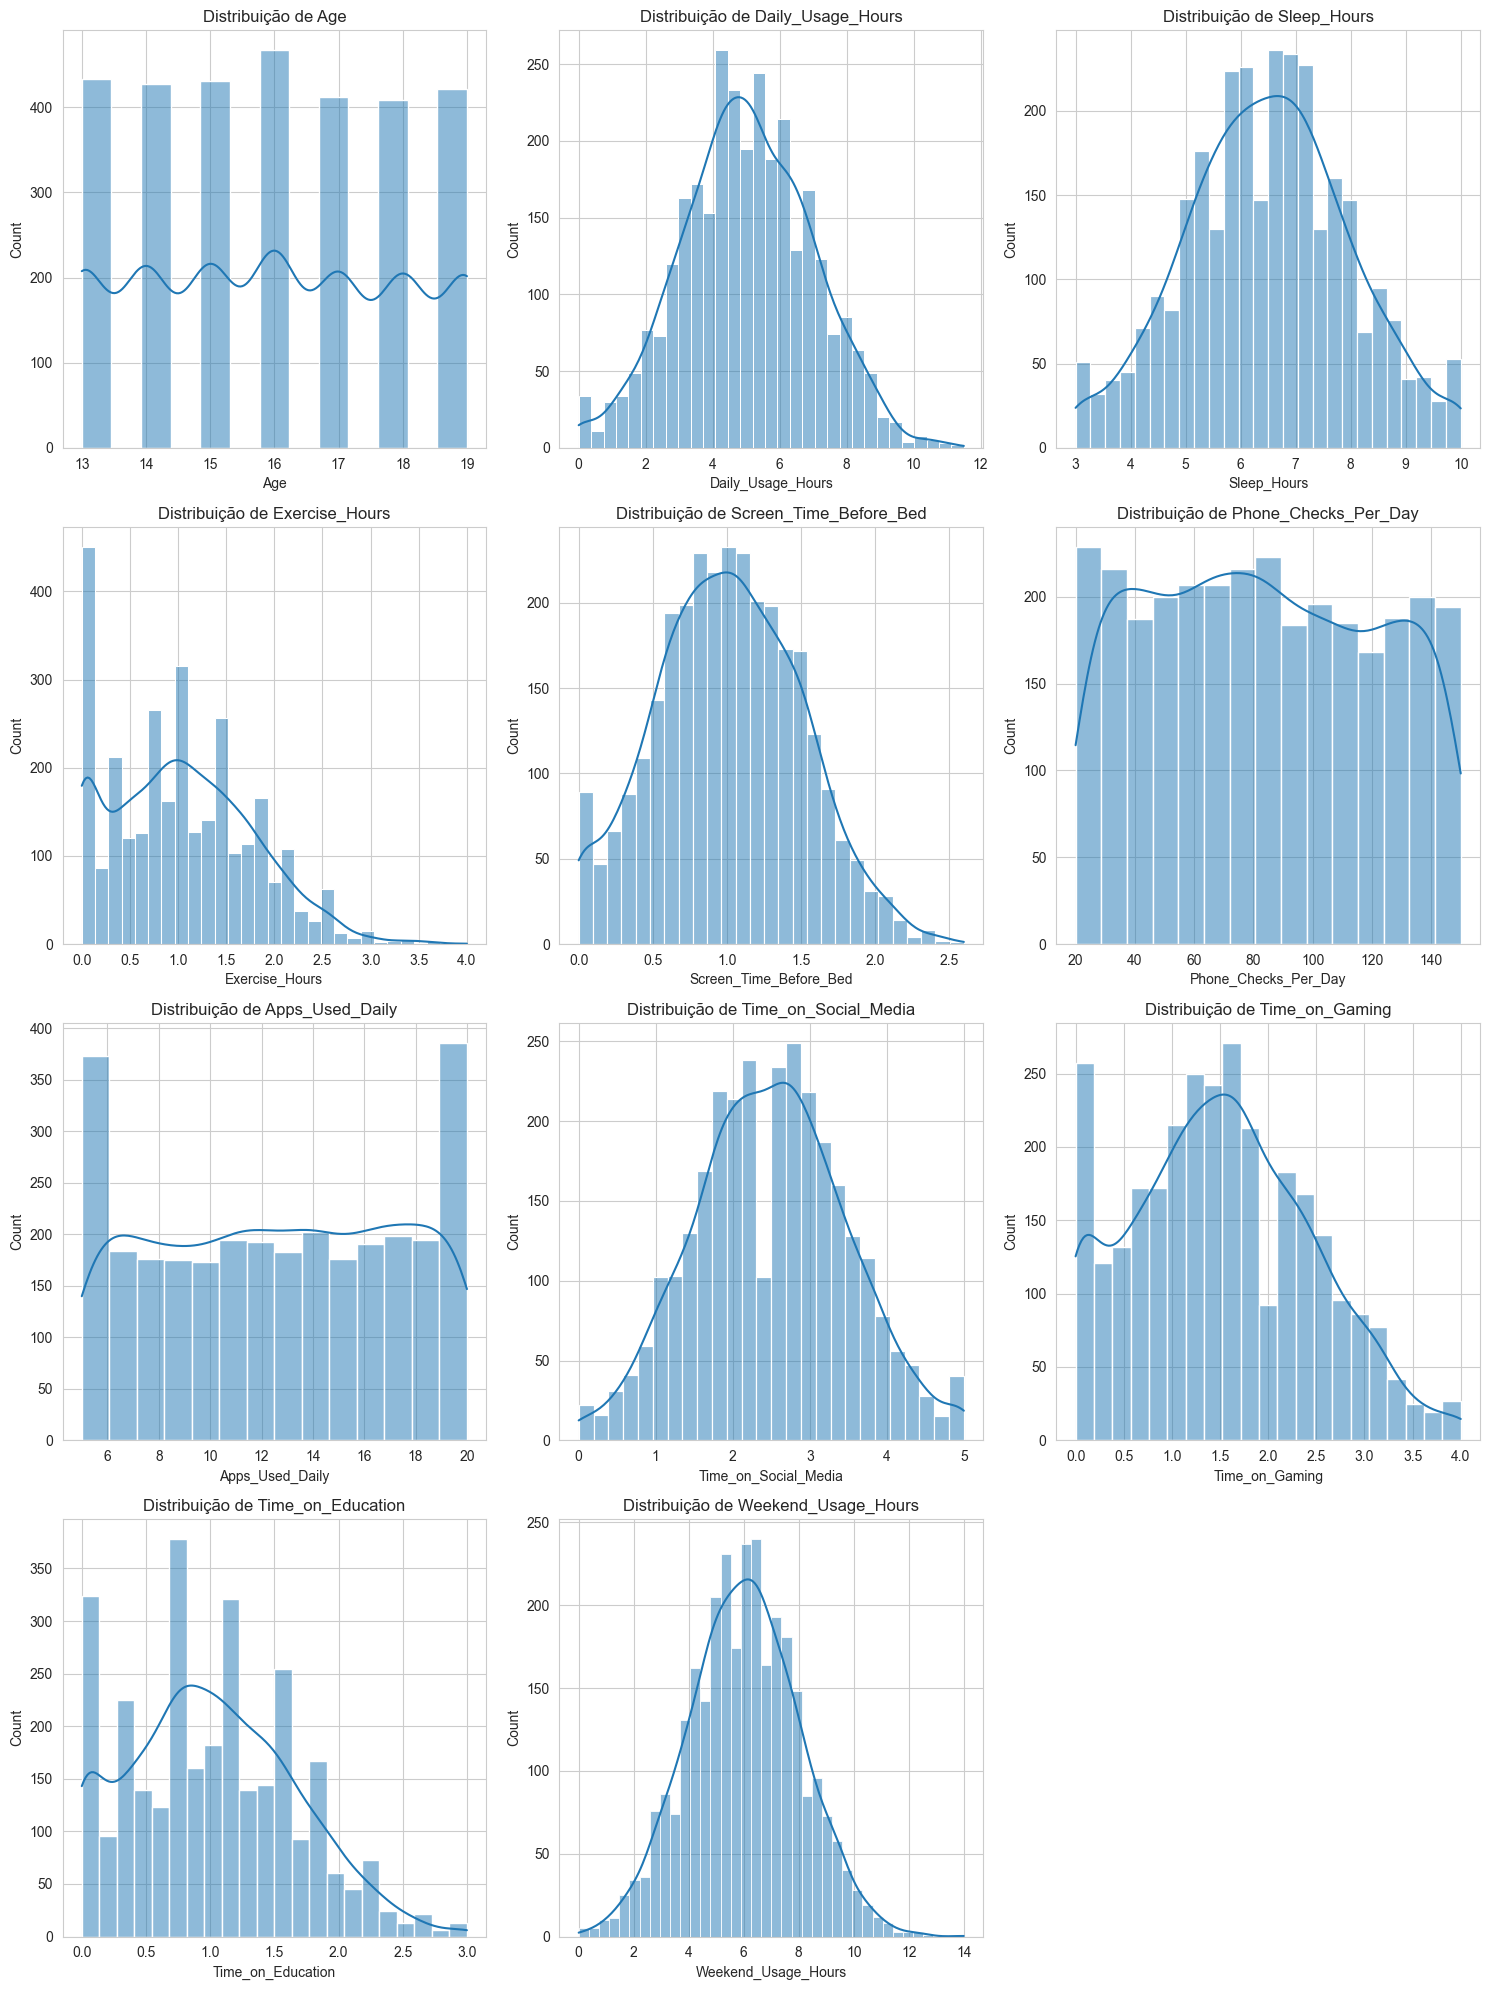

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20)) 
axes = axes.flatten() 

for i, col in enumerate(numericas):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribuição de {col}', fontsize=12)

for i in range(len(numericas), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
    